# ML MODEL ON IRIS DATASET WITH LOGISTIC REGRESSION ALGORITHM

In [61]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading the data set

In [12]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv")


In [20]:
data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [13]:
data.head() #printing the first 5 rows of the data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
data['species'].value_counts() #gives no of species

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [19]:
data.isnull().sum() #checks for number of null values in each column

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Splitting the data into training and testing data 

In [28]:
X=data.iloc[:,0:4]
y=data["species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [50]:
scaler = StandardScaler() #standardizing the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 


#### Creating and training the model

In [51]:
log_model = LogisticRegression() 
log_model.fit(X_train, y_train)

LogisticRegression()

#####  Predicting the model

In [52]:
y_pred = log_model.predict(X_test)


##### Evaluation of the model

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is :",round(accuracy *100),"%")

The accuracy of the model is : 97 %


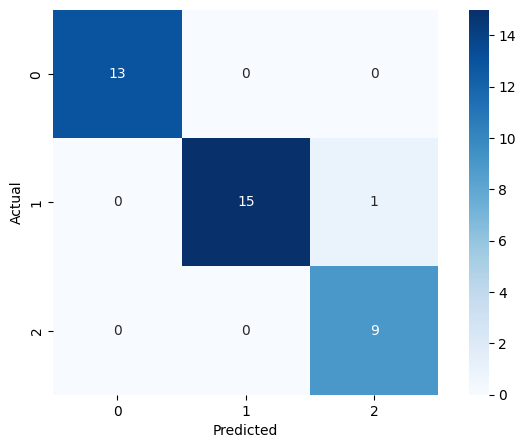

In [65]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
